In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure
plt.style.use('seaborn')

import scipy
from scipy import stats

# not sure if this would come in handy
import seaborn as sns

In [4]:
df = pd.read_csv('./data/raw.csv')

In [145]:
class element:
    def __init__(self, data, sd, se):
        self.data = data
        self.sd = sd
        self.se = se
    
    def get_sd(self):
        self.sd = np.std(self.data)
        return self.sd
    
    def get_se(self):
        self.se = np.std(self.data) / np.sqrt(len(self.data))
        return self.se

In [179]:
def graph(dataset: list, labels: list, title: str):
    data_list = []
    se_list = []

    for i in range(len(dataset)):
        dataset[i].get_sd()
        dataset[i].get_se()
        data_list.append(dataset[i].data.mean())
        se_list.append(dataset[i].se)

    figure(figsize=(6, 4), dpi=100)
    plt.bar(labels, data_list, yerr=se_list, width=0.45, error_kw=dict(lw=2, capsize=6, capthick=2))
    plt.title(title)
    plt.savefig('./img/primary/' + title + '.png', format='png', dpi=200)

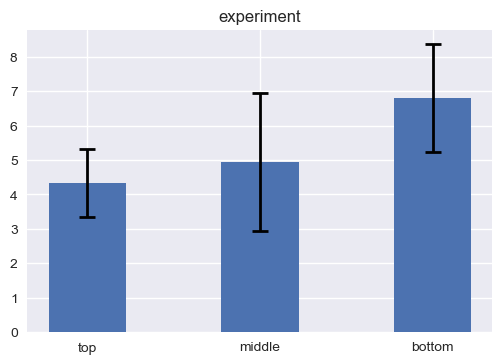

In [181]:
graph([LV4_yel_top, LV4_yel_mid, LV4_yel_bot], ['top', 'middle', 'bottom'], 'experiment')

#### Label Code
* Female: 0; Male: 1
* Left: 0; Right: 1
* Blue: 0; Green: 1; Red: 2; Pink: 3; Yellow: 4
* Top: 0; Middle: 1; Bottom: 2

### 1. Testing Between Genders
The p-value of LV6 and LV8 is incredibly small, whilst that of LV4 is between 0.05 to 0.1, which is somewhat acceptable.

In [31]:
LV4_tstat, LV4_pvalue = stats.ttest_ind(df[df['Gender'] == 0]['LV4'], df[df['Gender'] == 1]['LV4'])
LV6_tstat, LV6_pvalue = stats.ttest_ind(df[df['Gender'] == 0]['LV6'], df[df['Gender'] == 1]['LV6'])
LV8_tstat, LV8_pvalue = stats.ttest_ind(df[df['Gender'] == 0]['LV8'], df[df['Gender'] == 1]['LV8'])

#### LV4

In [106]:
LV4_tstat, LV4_pvalue

(1.7225057211582822, 0.08671481998202833)

#### LV6

In [107]:
LV6_tstat, LV6_pvalue

(-6.379751011104367, 1.485529814322812e-09)

#### LV8

In [134]:
LV8_tstat, LV8_pvalue

(-7.804470172260475, 4.905348798815167e-13)

### 2. Testing Between Areas

In [148]:
LV4_blu = element(df[df['Area'] == 0]['LV4'], 0, 0)
LV4_gre = element(df[df['Area'] == 1]['LV4'], 0, 0)
LV4_red = element(df[df['Area'] == 2]['LV4'], 0, 0)
LV4_pin = element(df[df['Area'] == 3]['LV4'], 0, 0)
LV4_yel = element(df[df['Area'] == 4]['LV4'], 0, 0)

LV4_area_fstat, LV4_area_pvalue = stats.f_oneway(LV4_blu.data, LV4_gre.data, LV4_red.data, LV4_pin.data, LV4_yel.data)
LV4_area_fstat, LV4_area_pvalue

(1.769060437705095, 0.13714518544562596)

In [149]:
LV6_blu = element(df[df['Area'] == 0]['LV6'], 0, 0)
LV6_gre = element(df[df['Area'] == 1]['LV6'], 0, 0)
LV6_red = element(df[df['Area'] == 2]['LV6'], 0, 0)
LV6_pin = element(df[df['Area'] == 3]['LV6'], 0, 0)
LV6_yel = element(df[df['Area'] == 4]['LV6'], 0, 0)

LV6_area_fstat, LV6_area_pvalue = stats.f_oneway(LV6_blu.data, LV6_gre.data, LV6_red.data, LV6_pin.data, LV6_yel.data)
LV6_area_fstat, LV6_area_pvalue

(7.10986374684215, 2.5082631448623883e-05)

In [150]:
LV8_blu = element(df[df['Area'] == 0]['LV8'], 0, 0)
LV8_gre = element(df[df['Area'] == 1]['LV8'], 0, 0)
LV8_red = element(df[df['Area'] == 2]['LV8'], 0, 0)
LV8_pin = element(df[df['Area'] == 3]['LV8'], 0, 0)
LV8_yel = element(df[df['Area'] == 4]['LV8'], 0, 0)

LV8_area_fstat, LV8_area_pvalue = stats.f_oneway(LV8_blu.data, LV8_gre.data, LV8_red.data, LV8_pin.data, LV8_yel.data)
LV8_area_fstat, LV8_area_pvalue

(5.123711844987352, 0.0006294245216580739)

### 3. Testing Between Positions

In [151]:
# Area: 0
LV4_blu_top = element(df.query('Area == 0 & Position == 0')['LV4'], 0, 0)
LV4_blu_mid = element(df.query('Area == 0 & Position == 1')['LV4'], 0, 0)
LV4_blu_bot = element(df.query('Area == 0 & Position == 2')['LV4'], 0, 0)

LV6_blu_top = element(df.query('Area == 0 & Position == 0')['LV6'], 0, 0)
LV6_blu_mid = element(df.query('Area == 0 & Position == 1')['LV6'], 0, 0)
LV6_blu_bot = element(df.query('Area == 0 & Position == 2')['LV6'], 0, 0)

LV8_blu_top = element(df.query('Area == 0 & Position == 0')['LV8'], 0, 0)
LV8_blu_mid = element(df.query('Area == 0 & Position == 1')['LV8'], 0, 0)
LV8_blu_bot = element(df.query('Area == 0 & Position == 2')['LV8'], 0, 0)

# Area: 1
LV4_gre_top = element(df.query('Area == 1 & Position == 0')['LV4'], 0, 0)
LV4_gre_mid = element(df.query('Area == 1 & Position == 1')['LV4'], 0, 0)
LV4_gre_bot = element(df.query('Area == 1 & Position == 2')['LV4'], 0, 0)

LV6_gre_top = element(df.query('Area == 1 & Position == 0')['LV6'], 0, 0)
LV6_gre_mid = element(df.query('Area == 1 & Position == 1')['LV6'], 0, 0)
LV6_gre_bot = element(df.query('Area == 1 & Position == 2')['LV6'], 0, 0)

LV8_gre_top = element(df.query('Area == 1 & Position == 0')['LV8'], 0, 0)
LV8_gre_mid = element(df.query('Area == 1 & Position == 1')['LV8'], 0, 0)
LV8_gre_bot = element(df.query('Area == 1 & Position == 2')['LV8'], 0, 0)

# Area: 2
LV4_red_top = element(df.query('Area == 2 & Position == 0')['LV4'], 0, 0)
LV4_red_mid = element(df.query('Area == 2 & Position == 1')['LV4'], 0, 0)
LV4_red_bot = element(df.query('Area == 2 & Position == 2')['LV4'], 0, 0)

LV6_red_top = element(df.query('Area == 2 & Position == 0')['LV6'], 0, 0)
LV6_red_mid = element(df.query('Area == 2 & Position == 1')['LV6'], 0, 0)
LV6_red_bot = element(df.query('Area == 2 & Position == 2')['LV6'], 0, 0)

LV8_red_top = element(df.query('Area == 2 & Position == 0')['LV8'], 0, 0)
LV8_red_mid = element(df.query('Area == 2 & Position == 1')['LV8'], 0, 0)
LV8_red_bot = element(df.query('Area == 2 & Position == 2')['LV8'], 0, 0)

# Area: 3
LV4_pin_top = element(df.query('Area == 3 & Position == 0')['LV4'], 0, 0)
LV4_pin_mid = element(df.query('Area == 3 & Position == 1')['LV4'], 0, 0)
LV4_pin_bot = element(df.query('Area == 3 & Position == 2')['LV4'], 0, 0)

LV6_pin_top = element(df.query('Area == 3 & Position == 0')['LV6'], 0, 0)
LV6_pin_mid = element(df.query('Area == 3 & Position == 1')['LV6'], 0, 0)
LV6_pin_bot = element(df.query('Area == 3 & Position == 2')['LV6'], 0, 0)

LV8_pin_top = element(df.query('Area == 3 & Position == 0')['LV8'], 0, 0)
LV8_pin_mid = element(df.query('Area == 3 & Position == 1')['LV8'], 0, 0)
LV8_pin_bot = element(df.query('Area == 3 & Position == 2')['LV8'], 0, 0)

# Area: 4
LV4_yel_top = element(df.query('Area == 4 & Position == 0')['LV4'], 0, 0)
LV4_yel_mid = element(df.query('Area == 4 & Position == 1')['LV4'], 0, 0)
LV4_yel_bot = element(df.query('Area == 4 & Position == 2')['LV4'], 0, 0)

LV6_yel_top = element(df.query('Area == 4 & Position == 0')['LV6'], 0, 0)
LV6_yel_mid = element(df.query('Area == 4 & Position == 1')['LV6'], 0, 0)
LV6_yel_bot = element(df.query('Area == 4 & Position == 2')['LV6'], 0, 0)

LV8_yel_top = element(df.query('Area == 4 & Position == 0')['LV8'], 0, 0)
LV8_yel_mid = element(df.query('Area == 4 & Position == 1')['LV8'], 0, 0)
LV8_yel_bot = element(df.query('Area == 4 & Position == 2')['LV8'], 0, 0)

#### 1. Blue

In [152]:
LV4_blu_fstat, LV4_blu_pvalue = stats.f_oneway(LV4_blu_top.data, LV4_blu_mid.data, LV4_blu_bot.data)
LV4_blu_fstat, LV4_blu_pvalue

(0.5122522048176913, 0.6038306781440823)

In [153]:
LV6_blu_fstat, LV6_blu_pvalue = stats.f_oneway(LV6_blu_top.data, LV6_blu_mid.data, LV6_blu_bot.data)
LV6_blu_fstat, LV6_blu_pvalue

(0.259184039167409, 0.7732371690038411)

In [154]:
LV8_blu_fstat, LV8_blu_pvalue = stats.f_oneway(LV8_blu_top.data, LV8_blu_mid.data, LV8_blu_bot.data)
LV8_blu_fstat, LV8_blu_pvalue

(0.1353699842219706, 0.8738752056068148)

#### 2. Green

In [155]:
LV4_gre_fstat, LV4_gre_pvalue = stats.f_oneway(LV4_gre_top.data, LV4_gre_mid.data, LV4_gre_bot.data)
LV4_gre_fstat, LV4_gre_pvalue

(2.8221217770180567, 0.07388914369728515)

In [156]:
LV6_gre_fstat, LV6_gre_pvalue = stats.f_oneway(LV6_gre_top.data, LV6_gre_mid.data, LV6_gre_bot.data)
LV6_gre_fstat, LV6_gre_pvalue

(2.840066991164798, 0.07276600085109794)

In [157]:
LV8_gre_fstat, LV8_gre_pvalue = stats.f_oneway(LV8_gre_top.data, LV8_gre_mid.data, LV8_gre_bot.data)
LV8_gre_fstat, LV8_gre_pvalue

(3.365253857526456, 0.0467662031277302)

#### 3. Red

In [158]:
LV4_red_fstat, LV4_red_pvalue = stats.f_oneway(LV4_red_top.data, LV4_red_mid.data, LV4_red_bot.data)
LV4_red_fstat, LV4_red_pvalue

(1.202007471141465, 0.31341047264365884)

In [159]:
LV6_red_fstat, LV6_red_pvalue = stats.f_oneway(LV6_red_top.data, LV6_red_mid.data, LV6_red_bot.data)
LV6_red_fstat, LV6_red_pvalue

(0.04192799578529871, 0.9589898247371054)

In [160]:
LV8_red_fstat, LV8_red_pvalue = stats.f_oneway(LV8_red_top.data, LV8_red_mid.data, LV8_red_bot.data)
LV8_red_fstat, LV8_red_pvalue

(0.04081210181631912, 0.9600578736103722)

#### 4. Pink

In [161]:
LV4_pin_fstat, LV4_pin_pvalue = stats.f_oneway(LV4_pin_top.data, LV4_pin_mid.data, LV4_pin_bot.data)
LV4_pin_fstat, LV4_pin_pvalue

(0.36587421201954645, 0.6963682141132543)

In [162]:
LV6_pin_fstat, LV6_pin_pvalue = stats.f_oneway(LV6_pin_top.data, LV6_pin_mid.data, LV6_pin_bot.data)
LV6_pin_fstat, LV6_pin_pvalue

(0.4721420218646577, 0.6278128994352445)

In [163]:
LV8_pin_fstat, LV8_pin_pvalue = stats.f_oneway(LV8_pin_top.data, LV8_pin_mid.data, LV8_pin_bot.data)
LV8_pin_fstat, LV8_pin_pvalue

(0.2718070217587091, 0.7636905975079189)

#### 5. Yellow

In [164]:
LV4_yel_fstat, LV4_yel_pvalue = stats.f_oneway(LV4_yel_top.data, LV4_yel_mid.data, LV4_yel_bot.data)
LV4_yel_fstat, LV4_yel_pvalue

(0.6022518045519608, 0.5534847862001244)

In [165]:
LV6_yel_fstat, LV6_yel_pvalue = stats.f_oneway(LV6_yel_top.data, LV6_yel_mid.data, LV6_yel_bot.data)
LV6_yel_fstat, LV6_yel_pvalue

(0.2560846942725727, 0.7756004572776191)

In [166]:
LV8_yel_fstat, LV8_yel_pvalue = stats.f_oneway(LV8_yel_top.data, LV8_yel_mid.data, LV8_yel_bot.data)
LV8_yel_fstat, LV8_yel_pvalue

(0.572098709013121, 0.5698374827733927)